**Decision Tree**


In [53]:
# Import necessary libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pandas as pd

In [46]:
# Loading your dataset
data = pd.read_csv('C:/Users/Sumanth/Downloads/heart_disease.csv')
data

,Gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,Heart_ stroke
0,Male,39,postgraduate,0,0.0,0.0,no,0,0,195.0,106.0,70.0,26.97,80.0,77.0,No
1,Female,46,primaryschool,0,0.0,0.0,no,0,0,250.0,121.0,81.0,28.73,95.0,76.0,No
2,Male,48,uneducated,1,20.0,0.0,no,0,0,245.0,127.5,80.0,25.34,75.0,70.0,No
3,Female,61,graduate,1,30.0,0.0,no,1,0,225.0,150.0,95.0,28.58,65.0,103.0,yes
4,Female,46,graduate,1,23.0,0.0,no,0,0,285.0,130.0,84.0,23.10,85.0,85.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,Male,50,uneducated,1,1.0,0.0,no,1,0,313.0,179.0,92.0,25.97,66.0,86.0,yes
4234,Male,51,graduate,1,43.0,0.0,no,0,0,207.0,126.5,80.0,19.71,65.0,68.0,No
4235,Female,48,primaryschool,1,20.0,NaN,no,0,0,248.0,131.0,72.0,22.00,84.0,86.0,No
4236,Female,44,uneducated,1,15.0,0.0,no,0,0,210.0,126.5,87.0,19.16,86.0,NaN,No


In [47]:
#viewing the columns
data.columns

Index(['Gender', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'Heart_ stroke'],
      dtype='object')

In [48]:
#dropping the columns
data = data.drop(columns=['education'])



In [9]:
# print the sum of missing values in the Data set
data.isnull().sum()

Gender               0
age                  0
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
Heart_ stroke        0
dtype: int64

In [50]:
#Dropping the null values
data=data.dropna()


In [52]:
# viewing the null values 
data.isnull().sum()

Gender             0
age                0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
Heart_ stroke      0
dtype: int64

In [12]:
#viewing the Gender column
data['Gender']

0         Male
1       Female
2         Male
3       Female
4       Female
         ...  
4231      Male
4232      Male
4233      Male
4234      Male
4237    Female
Name: Gender, Length: 3749, dtype: object

In [13]:
data['Gender'].value_counts()

Gender
Female    2080
Male      1669
Name: count, dtype: int64

In [14]:
# mapping the male and felame to 0 and 1
data['Gender'] = data['Gender'].map({'Male': 1, 'Female': 0})

C:\Users\Sumanth\AppData\Local\Temp\ipykernel_30500\2203776398.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Gender'] = data['Gender'].map({'Male': 1, 'Female': 0})


In [15]:
#view the Gender Column
data['Gender']

0       1
1       0
2       1
3       0
4       0
       ..
4231    1
4232    1
4233    1
4234    1
4237    0
Name: Gender, Length: 3749, dtype: int64

In [23]:
#Dropping the  prevalentStroke column
data = data.drop(columns=['prevalentStroke'])

In [24]:
data

,Gender,age,currentSmoker,cigsPerDay,BPMeds,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,Heart_ stroke
0,1,39,0,0.0,0.0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,No
1,0,46,0,0.0,0.0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,No
2,1,48,1,20.0,0.0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,No
3,0,61,1,30.0,0.0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,yes
4,0,46,1,23.0,0.0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4231,1,58,0,0.0,0.0,1,0,187.0,141.0,81.0,24.96,80.0,81.0,No
4232,1,68,0,0.0,0.0,1,0,176.0,168.0,97.0,23.14,60.0,79.0,yes
4233,1,50,1,1.0,0.0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,yes
4234,1,51,1,43.0,0.0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,No


In [25]:
# Define feature matrix X and target variable y
X = data[['Gender', 'age', 'currentSmoker', 'cigsPerDay', 'BPMeds',
                    'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
                    'diaBP', 'BMI', 'heartRate', 'glucose']]
y=data['Heart_ stroke']


In [26]:
# Split the data into training and testing sets
# Use 80% for training and 20% for testing, with a fixed random state for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [27]:
y_train

1065     No
3730     No
323      No
763     yes
1187     No
       ... 
934      No
3698     No
1858     No
2957     No
3101     No
Name: Heart_ stroke, Length: 2999, dtype: object

In [28]:
X_train

,Gender,age,currentSmoker,cigsPerDay,BPMeds,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
1065,1,41,0,0.0,0.0,0,0,324.0,129.5,92.5,34.99,79.0,103.0
3730,1,59,1,15.0,0.0,0,0,259.0,116.0,83.0,27.93,80.0,83.0
323,0,51,1,4.0,0.0,0,0,220.0,112.0,74.0,31.23,88.0,66.0
763,0,58,0,0.0,0.0,1,1,267.0,157.0,94.0,33.32,92.0,205.0
1187,1,50,1,20.0,0.0,0,0,261.0,114.0,64.0,22.32,85.0,71.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
934,1,62,1,20.0,0.0,0,0,168.0,129.5,87.0,20.56,65.0,80.0
3698,1,37,0,0.0,0.0,1,0,195.0,141.0,84.0,25.66,83.0,117.0
1858,1,60,0,0.0,0.0,0,0,241.0,119.5,79.0,24.66,60.0,78.0
2957,0,44,1,20.0,0.0,0,0,160.0,131.0,81.5,25.71,75.0,70.0


In [29]:

# Instantiate the decision tree classifier
model = DecisionTreeClassifier(random_state=42)

In [30]:
# Train the model on the training data
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [31]:
# Make predictions on the test set
Y_pred = model.predict(X_test)


In [32]:
# Evaluate the model
# Calculate accuracy, confusion matrix, and classification report
cm=confusion_matrix(y_test,Y_pred)
cm

array([[554,  87],
       [ 84,  25]], dtype=int64)

In [33]:
#printing the accuracay
accuracy = accuracy_score(y_test, Y_pred)
accuracy

0.772

|--- age <= 49.50
|   |--- sysBP <= 150.25
|   |   |--- BMI <= 39.81
|   |   |   |--- diaBP <= 55.50
|   |   |   |   |--- heartRate <= 63.50
|   |   |   |   |   |--- class: No
|   |   |   |   |--- heartRate >  63.50
|   |   |   |   |   |--- class: yes
|   |   |   |--- diaBP >  55.50
|   |   |   |   |--- totChol <= 289.50
|   |   |   |   |   |--- cigsPerDay <= 9.50
|   |   |   |   |   |   |--- heartRate <= 108.50
|   |   |   |   |   |   |   |--- age <= 46.50
|   |   |   |   |   |   |   |   |--- diaBP <= 80.75
|   |   |   |   |   |   |   |   |   |--- sysBP <= 98.50
|   |   |   |   |   |   |   |   |   |   |--- totChol <= 177.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: yes
|   |   |   |   |   |   |   |   |   |   |--- totChol >  177.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: No
|   |   |   |   |   |   |   |   |   |--- sysBP >  98.50
|   |   |   |   |   |   |   |   |   |   |--- glucose <= 87.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch o

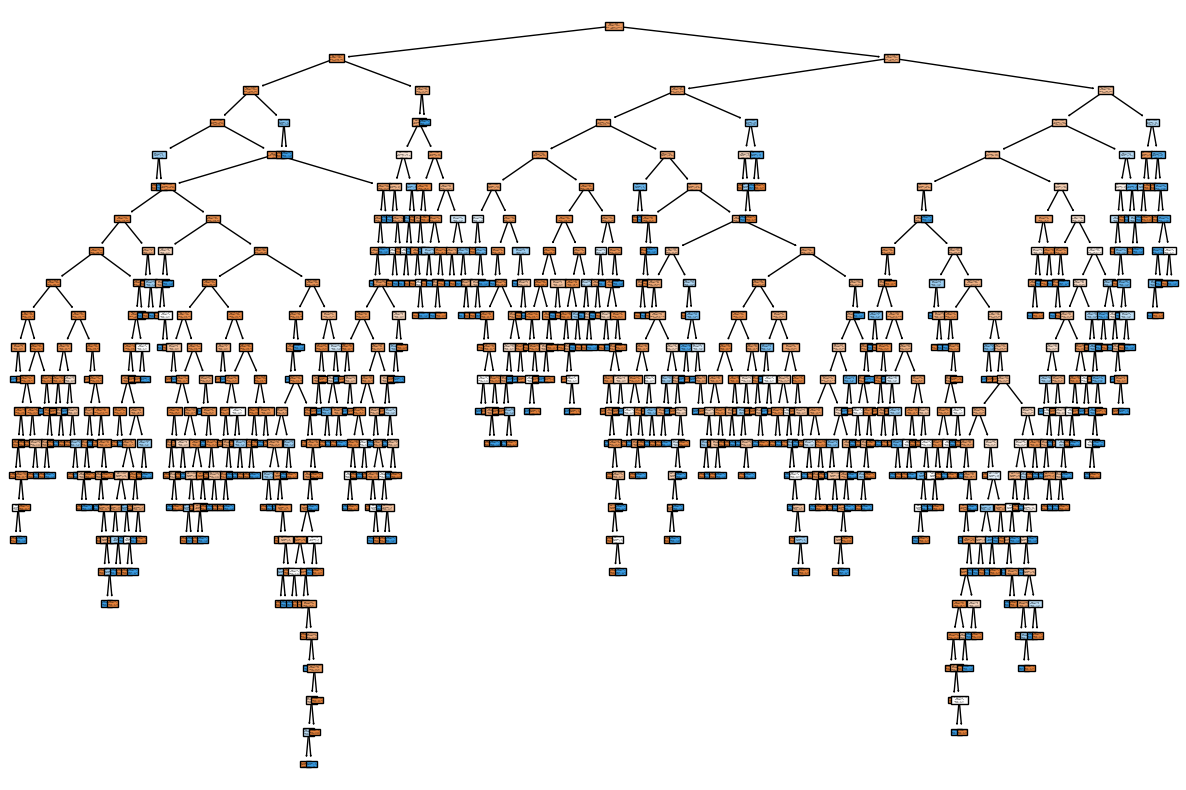

In [36]:
from sklearn.tree import export_text

# Visualising the decision tree using text representation
tree_rules = export_text(model, feature_names=list(X_train.columns))
print(tree_rules)

# Alternatively,  visualising the tree graph using plot_tree
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
plot_tree(model, feature_names=list(X_train.columns), filled=True, class_names=['No', 'Yes'])
plt.show()


**Trying to improve the accuracy from by the hypertuning parameters**

In [40]:
from sklearn.model_selection import GridSearchCV
# Define the Decision Tree model
model = DecisionTreeClassifier()

# Define the hyperparameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform Grid Search
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X, y)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 5}


In [41]:
best_params = {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 10}

# Create a Decision Tree model with the best hyperparameters
best_dt_model = DecisionTreeClassifier(**best_params)

# Train the model on the training data
best_dt_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_dt_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

In [42]:
accuracy

0.8386666666666667